# D54：clustering 1 非監督式機器學習簡介

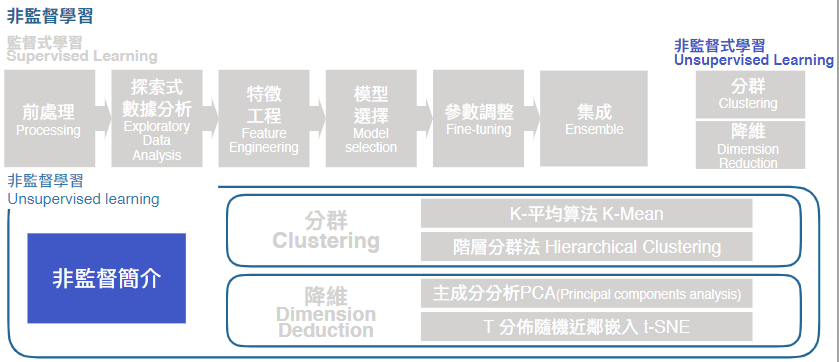

## 教學
1. 瞭解非監督式學習 (unsupervised learning) 相關技術概要。
2. 瞭解非監督式學習的應用場景。本日知識點目標。

### 什麼是非監督式學習？

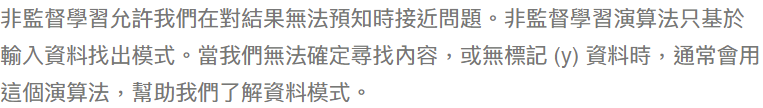

### 應⽤用案例（一）：客戶分群

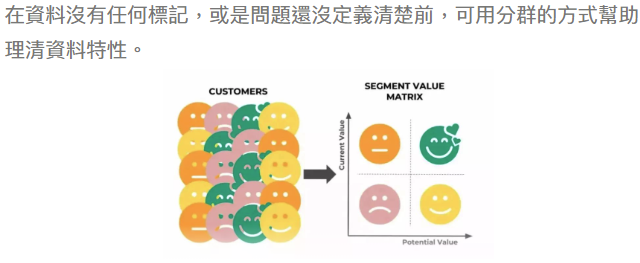

### 應⽤用案例（二）：特徵抽象化

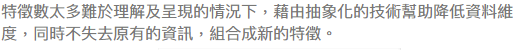

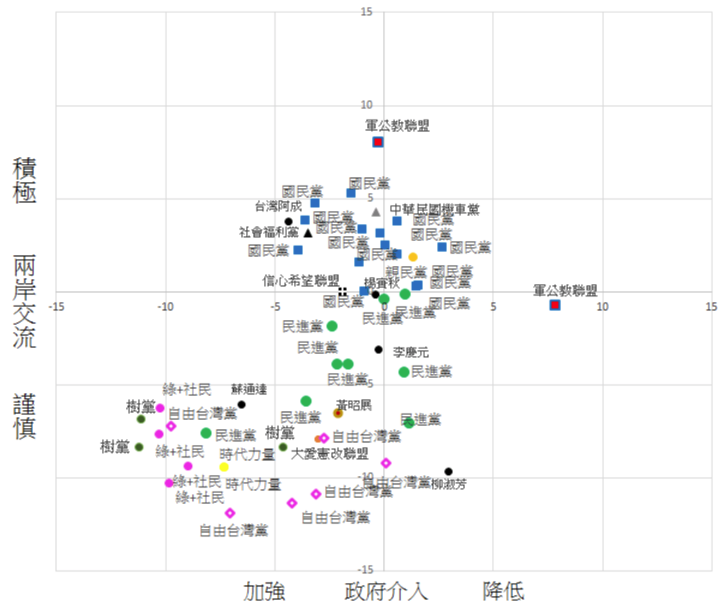

### 應用案例（三）：購物籃分析

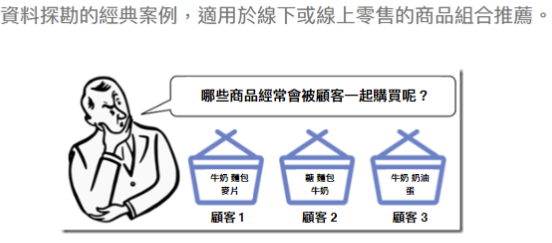

### 應用案例（四）：非結構化資料分析

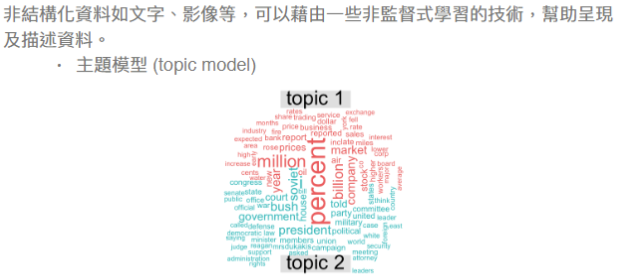

### 非監督學習算法概要

* 聚類分析：尋找資料的隱藏模式。
* 降低維度：特徵數太大且特徵間相關性高，以此方式縮減特徵維度。
* 其他：關聯法則(購物籃分析、異常值偵測、探索性資料分析... ...等)

## 重點複習
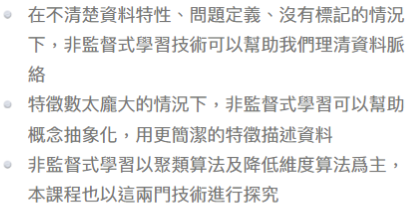

## 延伸閱讀
1. [Unsupervised learning：PCA](http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/PCA.mp4)
2. [scikit learning-Unsupervised learning](https://scikit-learn.org/stable/unsupervised_learning.html)
3. [Coursera Andrew Ng 教授](https://www.youtube.com/watch?v=jAA2g9ItoAc&feature=emb_logo)

## 作業

Q : 試著想想看，非監督學習是否有可能使用評價函數 (Metric) 來鑑別好壞呢?

(Hint : 可以分為 「有目標值」 與 「無目標值」 兩個方向思考)

# D55：clustering 2 聚類算法

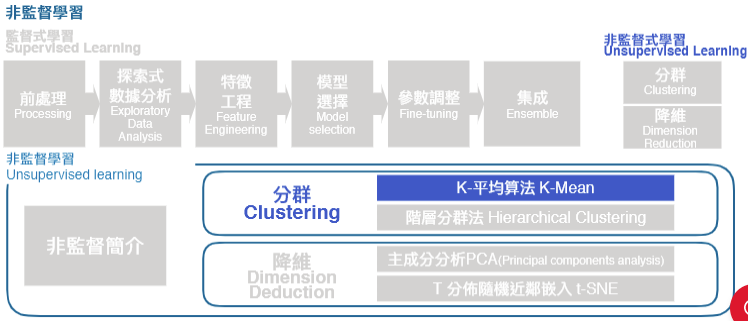

## 教學
1. 聚類算法與監督式學習的差異
2. K-means 聚類算法簡介
3. K-means 聚類算法的參數設計

### 聚類算法簡介

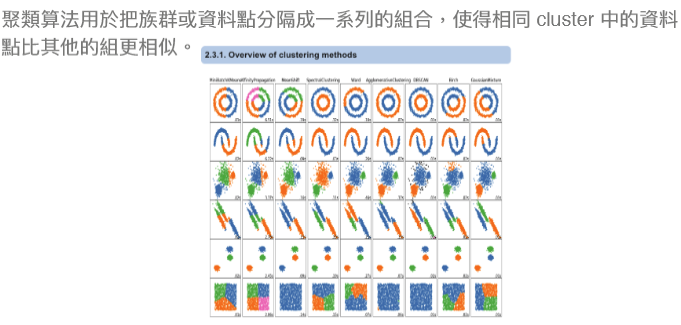

### Supervised learning vs. clustering (監督學習 vs 群聚)

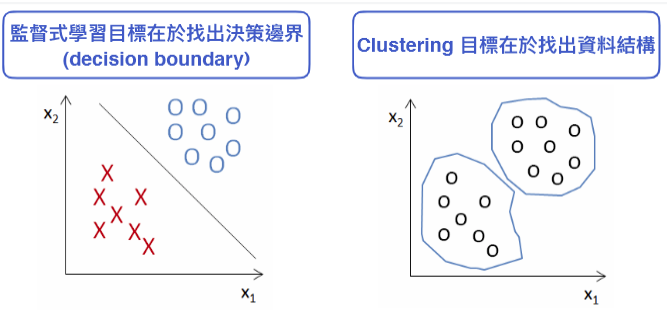

### Why clustering?
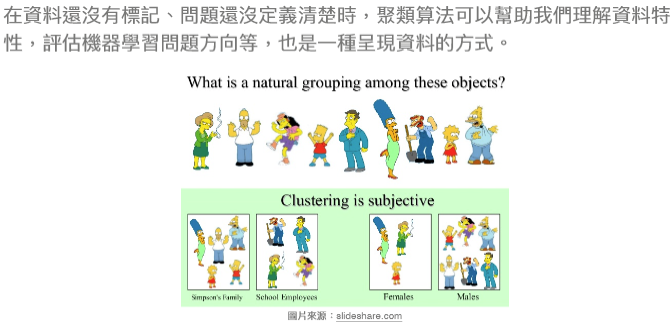

### K-means 聚類算法
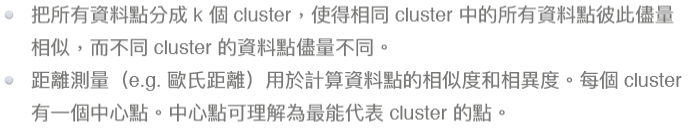

### K-means 算法流程
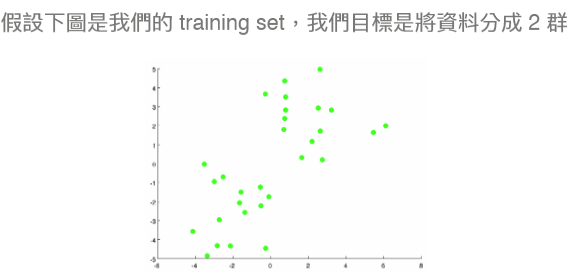

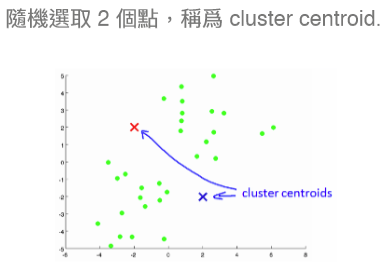

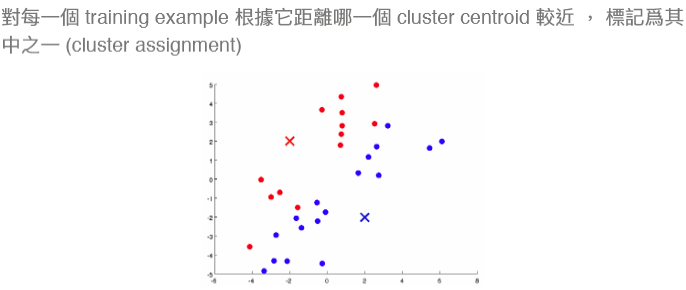

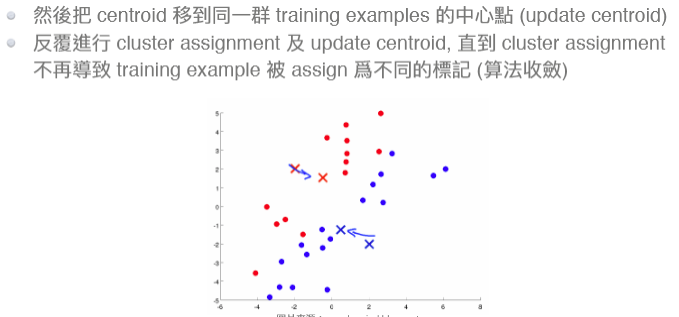

### Optimization Objective
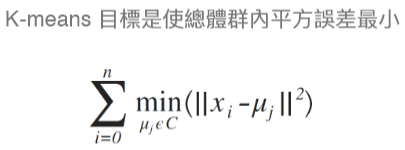

### K-means 注意事項
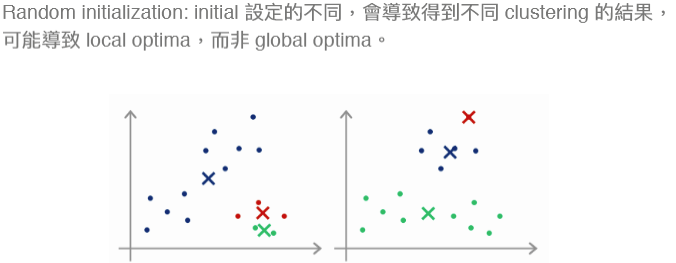

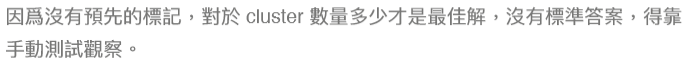

## 重點複習
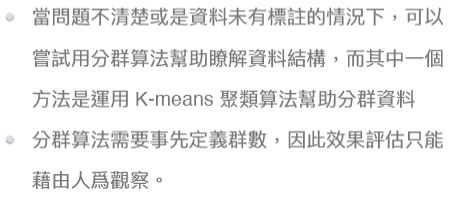

## 延伸閱讀
1. [Clustering(英文)](https://www.youtube.com/watch?v=aIybuNt9ps4)
2. [Lecture 13.2 — Clustering | KMeans Algorithm — [ Machine Learning | Andrew Ng ]](https://www.youtube.com/watch?v=hDmNF9JG3lo)
3. [Unsupervised Machine Learning: Flat Clustering](https://pythonprogramming.net/flat-clustering-machine-learning-python-scikit-learn/)

## 範例

    範例目標：讓同學了解如何使用 sklearn 執行 k-means
    範例重點：設定 模型估計參數 以及 資料建模 兩大區塊
    (Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [12]:
!pip3 install --user sklearn
!pip3 install --user --upgrade matplotlib

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Using cached https://files.pythonhosted.org/packages/18/a5/9bad289d6c159b0d52ede9a72ac061cffa2f7447a7279c856b408c59c376/matplotlib-3.2.1-cp37-cp37m-win32.whl


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


載入套件

In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib.pyplot'

載入 toy example 資料集

In [ ]:
toy = datasets.make_blobs(centers=3, n_features=4)
X = toy[0]
y = toy[1]

設定 模型 估計參數

In [ ]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

資料建模 並 視覺化 結果

In [ ]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()

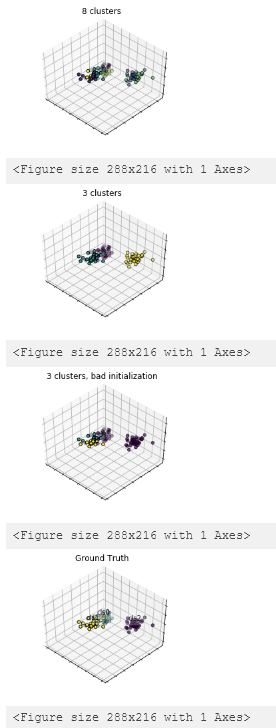

# D56：K-mean 觀察 : 使用輪廓分析

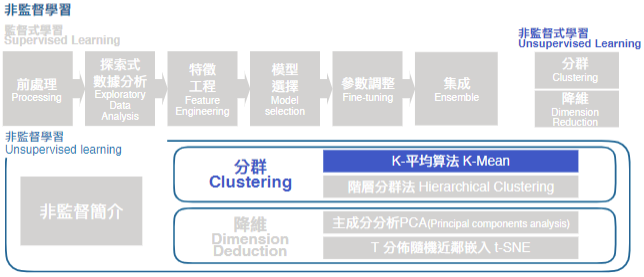

## 教學
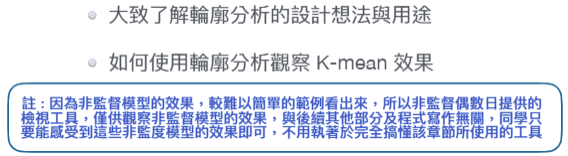

### 分群模型的評估
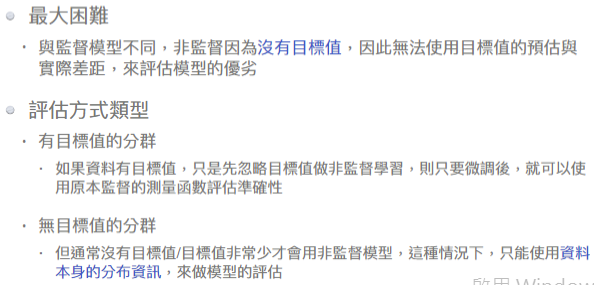

### 輪廓分析(Silhouette analysis)
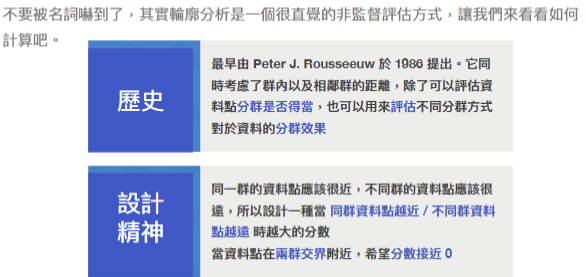

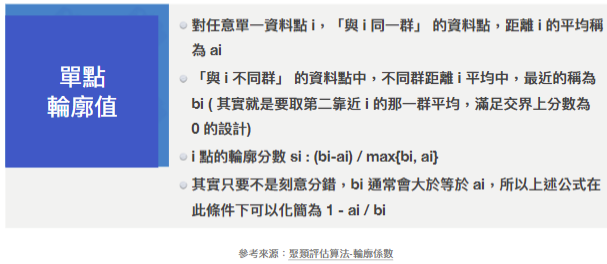

https://blog.csdn.net/wangxiaopeng0329/article/details/53542606

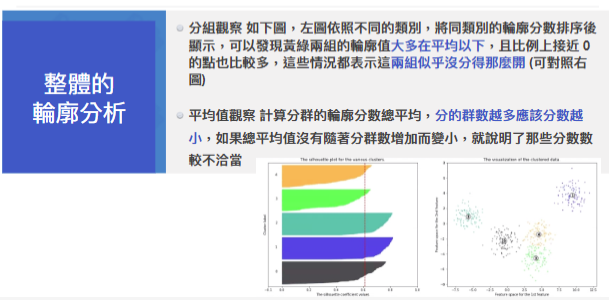

## 重點複習

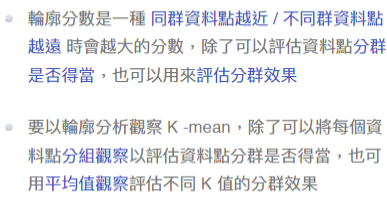

## 範例

    [作業目標]
    試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較
    [作業重點]
    使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])
    作業
    試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果

In [19]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib.pyplot'

In [ ]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

In [ ]:
# 計算並繪製輪廓分析的結果